# Image Preprocessing - OpenCV

- Author: Phanxuan Phuc
- Project: https://github.com/phanxuanphucnd/freelearningcv


**Table of content**

1. Vai trò của tiền xử lý ảnh


2. Tiền xử lý ảnh

    2.1 Các biến đổi hình học
        2.1.1 Phóng đại ảnh (Scale ảnh)
        2.1.2 Dịch chuyển ảnh (Translation)
        2.1.3 Xoay ảnh (Rotation)
        2.1.4 Biến đổi Affine
        2.1.5 Biến đổi phối cảnh (Perspective Transform)
        
    2.2 Làm mịn ảnh (Smoothing images)
        2.2.1 Bộ lọc tích chập 2D (2D convolutional)
        2.2.2 Làm mờ ảnh (Image blurring)
 
    2.3 Phương pháp Canny phát hiện Edge
    
    2.3 Contour
        2.4.1 Xác định xác Contour
        2.4.2 Các đặc trưng của Contour
        2.4.3 Bounding box
        2.4.4 Các thuộc tính của Contour
        2.4.5 Tìm bounding box trong Object detection


3. Kết luận

# Vai trò của tiền xử lý ảnh

Khi xây dựng, phát triển một thuật toán phân loại ảnh, chúng ta có thể gặp 1 số trường hợp không như kỳ vọng: Kết quả huấn luyện có độ chính xác cao trên cả `train dataset` và `dev dataset`, nhưng khi áp dụng vào thực tế nó lại cho độ chính xác thấp. Có nhiều nguyên nhân dẫn tới vấn đề này, một trong số đó có thể nghĩ tới:

- Các bức ảnh được huấn luyện khác xa so với những bức ảnh người dùng upload trong thực tế về các khía cạnh như: độ phân giải, cường độ màu sắc, chất lượng ảnh, độ to nhỏ của vật thể, chiều, hướng, và tư thế của các vật thể bên trong ảnh;
- Có thể các bức ảnh người dùng upload lên mặc dù cùng nhãn nhưng khác về tính chất so với các bức ảnh đã được huấn luyện. Ví dụ, trong một thuật toán phân loại `dog` và `cat`, `train dataset` chỉ bao gồm những con mèo trưởng thành nhưng thực tế người dùng lại upload lên rất nhiều hình ảnh của mèo con có thể dẫn đến thuật toán bị nhầm lẫn;
- Đối với một số tác vụ phân loại ảnh khó, đòi hỏi chuyên gia gán nhãn, rất dễ mắc sai lầm như chuẩn đoán bệnh nhãn cầu, ... Một số ít các ảnh trong `train dataset` có thể bị gán nhãn sai -> ảnh hưởng tới khả năng dự đoán của thuật toán;
- Bộ `train dataset` có kích thước quá nhỏ và không đại diện đủ cho toàn bộ các class được huấn luyện;
- Phân phối của `train dataset` khác xa so với thực tế. Chẳng hạn `tran dataset` chứa ảnh chó mèo tỉ lệ 50:50 nhưng số lượng ảnh người dùng upload lên ảnh `dog` chiếm đa số theo tỉ lệ `90:10`.

Và rất nhiều nguyên nhân khác dẫn tới thuật toán hoạt động không được như kì vọng. Khi đối mặt với các trường hợp trên chúng ta cần phải tìm ra nguyên nhân thực sự là gì và từ đó đưa ra những phương án thích hợp để khắc phục các lỗi mô hình. Các kỹ thuật để giải quyết các trường hợp lỗi như vậy đã được tổng hợp trong cuốn sách **[Khao khát học máy - Andrew Ng](https://github.com/phanxuanphucnd/book4ai/blob/main/Kh%C3%A1t%20Khao%20H%E1%BB%8Dc%20M%C3%A1y%20(Machine%20Learning%20Yearning.pdf)**. Một số hướng giải quyết tác giả nêu ra như: Thay đổi tập `train dataset` và `dev dataset`, thống kê lỗi và tìm cách giải quyết các lỗi chính mang lại cải thiện lớn, xác định `train dataset`/ `dev dataset` và phép đo đơn trị thích hợp ngay từ đầu cho bài toán, áo dụng các phương phpas và kiến trúc mô hình khác nhau, ...

Trong trường hợp dữ liệu không đủ lớn, dữ liệu gán nhãn với chi phí cao (như chuẩn đoán bệnh qua hình ảnh, phải tìm được bệnh nhân gặp đúng bác sĩ đó và bác sĩ chuyên khoa để chuẩn đoán), việc thay đổi tập dữ liệu là khá tốn chi phí. Có một phương pháp mà có thể giúp gia tăng số lượng ảnh đầu vào đó là `tăng cường dữ liệu` (`data augmentation`) sử dụng dụng các phép biến đổi `tiền xử lý hình ảnh` đầu vào. Đây là một phương pháp hiệu quả nhằm thay đổi tập dữ liệu huấn luyện và từ đó giúp cải thiện hiệu quả dự đoán.

# Tiền xử lý ảnh

## Các biến đổi hình học

Các phép biến đổi hình ảnh từ một hình dạng này sang một hình dạng khác thông qua việc làm thay đổi `phương`, `chiều`, `góc`, `cạnh` mà không làm thay đổi nội dung của ảnh. Về mặt lý thuyết toán học, một phép biến đổi được định nghĩa như sau:

<img src="../imgs/img1.png" width="100%" height="100%" align="center"/>

=> Để xác định một phép biến đổi hình học, ta cần xác định được ma trận chuyển dịch của nó là gì? _(Ma trận chuyển dịch là đặc trưng để biểu diễn các dạng biến đổi khác nhau)._

### Phóng đại ảnh (Scale ảnh)

Scale ảnh là việc chúng ta thay đổi kích thước dài, rộng của ảnh mà không làm thay đổi tính chất song song của các đoạn thẳng trên ảnh gốc so với các trục tọa độ X và Y. 

<img src="../imgs/img2.png" width="100%" height="100%" align="center"/>

In [1]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO

In [2]:
url = 'https://i.imgur.com/QkhPJNL.jpeg'

def _download_image(url):
    resp = requests.get(url)
    img = np.asarray(bytearray(resp.content), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    
    return img

img = _download_image(url)
print(f"Original image shape: {img.shape}")

# Scale image bằng cách gấp đôi with và height

%time
h, w = img.shape[:2]
img_scale = cv2.resize(img, (int(w*2), int(h*2)), interpolation=cv2.INTER_LINEAR)
print(f"Scale image shape: {img_scale.shape}")

Original image shape: (1463, 2197, 3)
CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 5.01 µs
Scale image shape: (2926, 4394, 3)


(<AxesSubplot:title={'center':'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'))

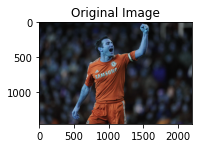

In [3]:
plt.subplot(121),plt.imshow(img),plt.title("Original Image")

(<AxesSubplot:title={'center':'Scaled Image'}>,
 Text(0.5, 1.0, 'Scaled Image'))

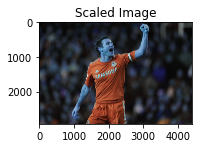

In [4]:
plt.subplot(121),plt.imshow(img_scale),plt.title("Scaled Image")

### Dịch chuyển ảnh (Translation)

<img src="../imgs/img3.png" width="100%" height="100%" align="center"/>

(<AxesSubplot:title={'center':'Translate to Bottom Right'}>,
 Text(0.5, 1.0, 'Translate to Bottom Right'))

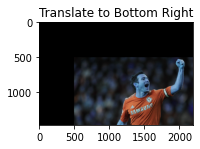

In [5]:
rows, cols = img.shape[:2]

# TODO: Dịch chuyển ảnh xuống gốc dưới phải
tx, ty = (500, 500)
M1 = np.array([[1, 0, tx], 
               [0, 1, ty]], dtype=np.float32)

tran1 = cv2.warpAffine(img, M1, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran1),plt.title('Translate to Bottom Right')

(<AxesSubplot:title={'center':'Translate to Bottom Left'}>,
 Text(0.5, 1.0, 'Translate to Bottom Left'))

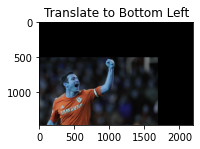

In [6]:
# TODO: Dịch chuyển ảnh xuống góc dưới trái

M2 = np.array([[1, 0, -tx],
               [0, 1, ty]], dtype=np.float32)

tran2 = cv2.warpAffine(img, M2, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran2),plt.title('Translate to Bottom Left')

(<AxesSubplot:title={'center':'Translate to Up Left'}>,
 Text(0.5, 1.0, 'Translate to Up Left'))

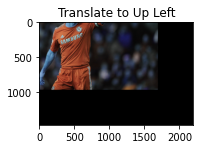

In [7]:
# TODO: Dịch chuyển ảnh xuống góc trên trái

M3 = np.array([[1, 0, -tx],
               [0, 1, -ty]], dtype=np.float32)

tran3 = cv2.warpAffine(img, M3, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran3),plt.title('Translate to Up Left')

(<AxesSubplot:title={'center':'Translate to Up Right'}>,
 Text(0.5, 1.0, 'Translate to Up Right'))

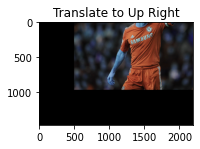

In [8]:
# TODO: Dịch chuyển ảnh xuống góc trên phải

M4 = np.array([[1, 0, tx],
               [0, 1, -ty]], dtype=np.float32)

tran4 = cv2.warpAffine(img, M4, (cols, rows))

plt.figure(figsize=(16, 4))
plt.subplot(152),plt.imshow(tran4),plt.title('Translate to Up Right')

### Xoay ảnh (Rotation)

<img src="../imgs/img4.png" width="100%" height="100%" align="center"/>

(<AxesSubplot:title={'center':'Rotate 45 at centroid'}>,
 Text(0.5, 1.0, 'Rotate 45 at centroid'))

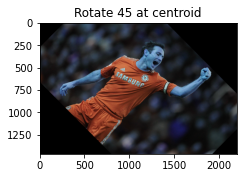

In [9]:
# TODO: Xoay ảnh kích thước 45 độ tại tâm của ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=-45, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 45 at centroid')

(<AxesSubplot:title={'center':'Rotate 45 at centroid, resize 1/2'}>,
 Text(0.5, 1.0, 'Rotate 45 at centroid, resize 1/2'))

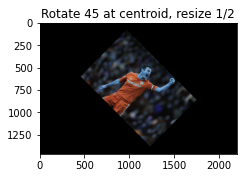

In [10]:
# TODO: Xoay ảnh kích thước 45 độ tại tâm của ảnh, độ phóng đại giảm 1/2

M5 = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=-45, scale=1/2)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 45 at centroid, resize 1/2')

(<AxesSubplot:title={'center':'Rotate 25 at upper left'}>,
 Text(0.5, 1.0, 'Rotate 25 at upper left'))

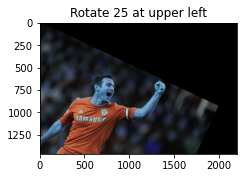

In [11]:
# TODO: Xoay ảnh kích thước 25 độ tại góc trên trái ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(0, 0), angle=-25, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 25 at upper left')

(<AxesSubplot:title={'center':'Rotate 25 at bottom right'}>,
 Text(0.5, 1.0, 'Rotate 25 at bottom right'))

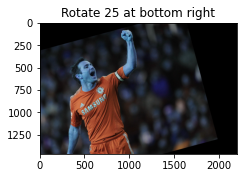

In [12]:
# TODO: Xoay ảnh kích thước 155 độ tại góc dưới phải ảnh, độ phóng đại không đổi

M5 = cv2.getRotationMatrix2D(center=(rows, cols), angle=15, scale=1)
tran5 = cv2.warpAffine(img, M5, (cols, rows))

plt.figure(figsize=(12, 8))
plt.subplot(232),plt.imshow(tran5),plt.title('Rotate 25 at bottom right')

### Biến đổi Affine

Trong biến đổi affine, toàn bộ các đường thẳng song song trong bức ảnh gốc giữ nguyên tính chất song song ở ảnh đầu ra. Để tìm ma trận chuyển vị, chúng ta cần xác định ra **3 điểm** từ ảnh đầu vào và tọa độ tương ứng của chúng trong hình ảnh đầu ra. Hàm `cv2.getAffineTransform` sẽ tạo ra được một ma trận `2x3` được truyền vào hàm `cv2.warpAffine`.

Phép biến đổi Affine có thể giúp ta tạo nhiều biến thể, tư thế khác nhau cho cùng một vật thể. Thường được áp dụng trong Data Augmentation để làm giàu dữ liệu trong trường hợp số lượng ảnh không nhiều. Chẳng hạn với mặt người đang chụp nghiêng ta có thể xoay theo các chiều sao cho từ mặt nghiêng trở thnafh mặt mặt chính diện, ...

Một số nghiên cứu chỉ ra rằng khi áp dụng phương pháp Data Augmentation thì độ chính xác của thuật toán của thuật toán với số lượng ảnh huấn luyện nhỏ có thể không thua kém những thuật toán được huấn luyện trên nhiều dữ liệu hơn về độ chính xác.

In [13]:
rows, cols, ch = img.shape

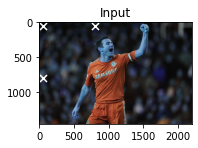

In [14]:
pts1 = np.float32([[50, 50], [800, 50], [50, 800]])
pts2 = np.float32([[50,600], [1100,150], [150, 1000]])

M = cv2.getAffineTransform(pts1, pts2)
imgAffine = cv2.warpAffine(img, M, (cols, rows))

# Hiển thị hình ảnh gốc và 3 điểm ban đầu trên ảnh
plt.subplot(121),plt.imshow(img),plt.title('Input')
for (x, y) in pts1:
    plt.scatter(x, y, s=50, c='white', marker='x')

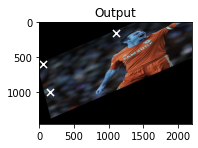

In [15]:
# Hiển thị hình ảnh sau dịch chuyển và 3 điểm mục tiêu của phép dịch chuyển.
plt.subplot(122),plt.imshow(imgAffine),plt.title('Output')
for (x, y) in pts2:
    plt.scatter(x, y, s=50, c='white', marker='x')

### Biến đổi phối cảnh (Perspective Transform)

Để biến đổi phối cảnh thì chúng ta cần một ma trận biến đổi `3x3`. Đường thẳng sẽ giữ nguyên là đường thẳng sau biến đổi. Để tìm được ma trận biến đổi này, chúng ta cần tim ra **4 điểm** trong ảnh đầu vào tương ứng với các điểm ảnh đầu ra. Trong số 4 điểm này, không có bất kì 3 điểm nào thẳng hàng. Sau đó ma trận biến đổi có thể được thiết lập thông qua hàm số `cv2.getPerspectiveTransform`. Và áp dụng `cv2.warpPerspective` với ma trận biến đổi `3x3`.

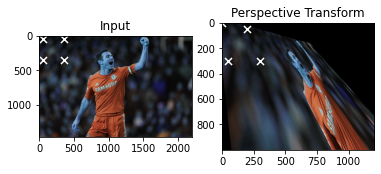

In [16]:
pts1 = np.float32([[50,50],[350,50],[50,350],[350,350]])
pts2 = np.float32([[0,0],[200,50],[50,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1200, 1000))
plt.subplot(121),plt.imshow(img), plt.title('Input')
for (x, y) in pts1:
    plt.scatter(x, y, s=50, c='white', marker='x')
    
plt.subplot(122),plt.imshow(dst),plt.title('Perspective Transform')
for (x, y) in pts2:
    plt.scatter(x, y, s=50, c='white', marker='x')

plt.show()

Phép biến đổi này cũng gần giống như phép biến đổi Affine. Khác biệt đó là nó chỉ trả ra bức ảnh là biến đổi trên vùng bị giới hạn trong tọa độ của 4 điểm gốc thay vì trên toàn bộ bức ảnh như phép biến đổi Affine. Trong trường hợp muốn `crop` ảnh ta sẽ xác định trước 4 tọa độ của 4 gốc và sử dụng phép biến đổi phối cảnh giữa 4 điểm với chính các điểm đó.

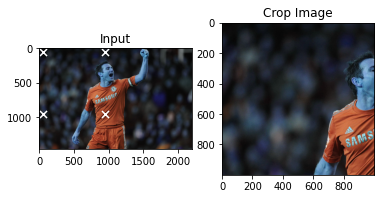

In [17]:
pts1 = np.float32([[50,50],[950, 50],[50,950],[950,950]])

M = cv2.getPerspectiveTransform(pts1,pts1)

dst = cv2.warpPerspective(img,M,(1000, 1000))

plt.subplot(121),plt.imshow(img),plt.title('Input')
for (x, y) in pts1:
    plt.scatter(x, y, s=50, c='white', marker='x')

plt.subplot(122),plt.imshow(dst),plt.title('Crop Image')
plt.show()

## Làm mịn ảnh (smotthing images)

### Bộ lọc tích chập 2D (2D convolutional)

<img src="../imgs/img5.png" width="100%" height="100%" align="center"/>

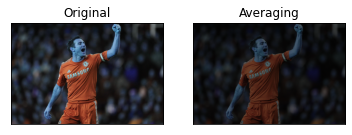

In [18]:
import cv2
import numpy as np

kernel = np.ones((5, 5), np.float32) / 50
imgsmooth = cv2.filter2D(img, -1, kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgsmooth),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### Làm mờ ảnh (Image blurring)

Các ảnh mờ có thể thu được thông qua phpe stichs chập hình ảnh với bộ lọc LPF. Đây là những bộ lọc rất hữu ích trong việc loại bỏ nhiễu. Trên thực tế, nó loại bỏ các nội dung tần số cao (chẳng hạn như nhiễu, các cạnh) khỏi hình ảnh dẫn đến các cạnh bị làm mờ khi bộ lọc được áp dụng. Có rất nhiều kĩ thuật làm mờ ảnh mà không làm mờ cấc cạnh. `OpenCV` cung cấp 4 kĩ thuật làm mờ chủ yếu:

1. Trung bình (Average)

    Tương tự như tích chập 2 chiều, chúng cũng sử dụng một ma trận vuông 2 chiều gồm toàn giá trị 1 để lấy trung bình trên các vùng cục bộ (local region). Chúng ta có thể thực hiện thông qua các hàm `cv2.blur()` và `cv2.boxFilter()`.

2. Bộ lọc Gaussian

    Bộ lọc Gaussian được khởi tạo thông qua hàm `cv2.GaussianBlur()`. Chúng ta cần xác định độ lệch chuẩn theo 2 phương X và Y là $\alpha_{x}$ và $\alpha_{y}$. Bộ lọc Gaussian rất hiệu quả tỏng việc xóa bỏ noise khỏi hình ảnh.

3. Median

    Bộ lọc Median được khởi tạo thông qua hàm `cv2.medianBlur()`. Cũng tương tự như bộ lục trung bình, nhưng thay vì tính mean thì ta tính toán các median của toàn bộ xác pixels trên một vùng cục bộ và thay thế các điểm trên vùng cục bộ bằng median.

4. Bilateral

    Bộ lọc Bilateral được khởi tạo thông qua hàm `cv2.bilateralFilter()`. Các bộ lọc trình bày trước đó có xu hướng làm mờ cạnh. Tuy nhiên, bộ lọc này chỉ loại bỏ noise mà vẫn bảo tồn được các cạnh.

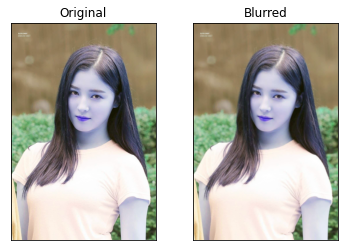

In [19]:
url = 'https://photo-2-baomoi.zadn.vn/w1000_r1/2019_05_10_351_30668071/06856d2daf6c46321f7d.jpg'
img = _download_image(url)

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

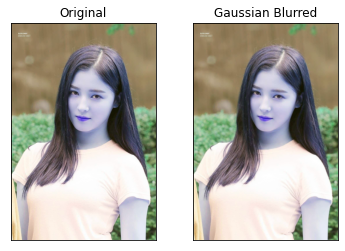

In [20]:
gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gaussian_img),plt.title('Gaussian Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

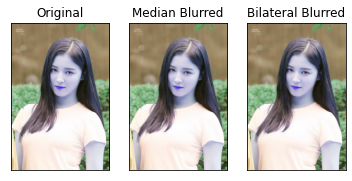

In [21]:
median_img = cv2.medianBlur(img, 5, 0)
bilateral_img = cv2.bilateralFilter(img, 9, 75, 75)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(median_img),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(bilateral_img),plt.title('Bilateral Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Phương pháp Canny phát hiện edge

`Canny` là một phương pháp phát hiện edge phổ biến được phát triển bởi John F.Canny vào năm 1986. Nó là một phương pháp được thực hiện qua nhiều bước như sau:

1. Giảm nhiễu ảnh
    
    Bởi vì phát hiện edge dễ gây ra nhiễu trong ảnh nên bước đầu tiên giảm nhiễu cho ảnh bằng bộ lọc Gaussian kích thước `5x5`.
    
    
2. Tìm kiếm cường độ gradient của bức ảnh
    
    Ảnh được làm mịn sau đố được lọc qua bộ lọc Sobel theo cả 2 chiều dọc và ngang để thu được đạo hàm bậc 1 thoe 2 phương x và y lần lượt là $G_{x}$ và $G_{y}$. Từ những hình ảnh này, chúng ta có thể tìm được độ dài cạnh gradient và phương cho mỗi pixel như bên dưới:
    
    $|G| = \sqrt{G_x^2 + G_y^2}$
    
    $\theta = \arctan(\frac{G_y}{G_x})$
    
    Phương gradient luôn luôn vuông góc với các cạnh. Nó được làm tròn thành một trong 4 góc biểu diễn trục dọc, ngang và 2 phương của đường chéo.
    
    
3. Triệt tiêu Phi tối đa (Non-maximum Suppresion)

    Triệt tiêu phi tối đa (Non-maximum suppresion) hiểu đơn giản là một thuật toán loại bỏ nếu như không phải giá trị lớn nhất. Trong `object detection`, để phát hiện các bounding box thì ta sẽ tìm ra trong tập các bounding box mà tỷ lệ overlap len anchor box lớn hơn 0.5 một bounding box có kích thước lớn nhất và xóa các bounding box còn lại.
    Đối với tìm edge cũng vậy. Sau khi nhận được độ lớn của gradient và phương, một lượt quét được thực hiện trên các bức ảnh để loại bỏ bất kì pixels nào không tạo thành cạnh. Để thực hiện điều đó, tại mỗi pixel, pixel được kiểm tra xem liệu nó có là một cực đại cục bộ trong số các lân cận của nó theo phương của gradient. Như hình ảnh bên dưới:
    <img src="../imgs/img7.png" width="45%" height="45%" align="center" title="Phương pháp xác định edge của thuật toán Canny"/>
    
    Điểm A nằm trên cạnh (theo chiều dọc). Phương gradient là norm chuẩn của cạnh. Điểm B và C là điểm nằm trên phương gradient. Nếu điểm A được kiểm tra với điểm B và C để xem liệu nó có là cực đại cục bộ. Nếu như vậy, nó được xem xét giữ lại cho bước tiếp theo, trái lại thì nó sẽ bị triệt tiêu (bằng cách thiết lập bằng 0).
    

4. Ngưỡng độ trễ (Hysteresis Thresholding)

    Ở bước này, ta sẽ quyết định xem toàn bộ các cạnh có những cạnh nào là thực sự và những cạnh nào không thông qua việc thiết lập ngưỡng gồm 2 giá trị, *minVal* và *maxVal*. Một cạnh bất kì có cường độ gradient lớn hơn *maxVal* thì chắc chắn là các cạnh và những cạnh có cường độ gradient nhỏ hơn sẽ không được coi là cạnh. Nếu một cạnh mà có những điểm ảnh nằm trong ngưỡng này thì có thể được xem xét thuộc cùng một cạnh hoặc không thuộc dựa trên sự kết nối của các điểm ảnh với nhau. Cụ thể như hình bên dưới:
    
    <img src="../imgs/img8.png" width="45%" height="45%" align="center"/>
    
    Trên hình vẽ là 2 cạnh A màu đỏ và B màu xanh. Cạnh A do có các điểm có cường độ gradient nằm trên *maxVal* nên được xem là những cạnh đạt tiêu chuẩn. Mặc dù trên cạnh A có những điểm nằm trong ngưỡng từ *minVal* tới *maxVal*. Cạnh B được xem là không đạt tiêu chuẩn vì toàn bộ các điểm nằm trên cạnh B đều nằm trong ngưỡng *minVal* tới *maxVal*. Như vậy cạnh A sẽ được giữ lại và cạnh B sẽ được xóa bỏ.
    

Bước này chúng ta cũng loại bỏ các điểm pixels là nhiễu (thực chất là các cạnh nhưng quá ngắn) dựa trên giải định rằng các cạnh là những đường dài.

Để sử dụng thuật toán `Canny` trong `OpenCV` bằng cách sử dụng hàm `cv2.Canny()`. Trong hàm số này chúng ta sẽ khai báo tham số đầu tiên là hình ảnh đầu vào, tham số thứ 2 và thứ 3 lần lượt là ngưỡng `minVal` và `maxVal`.

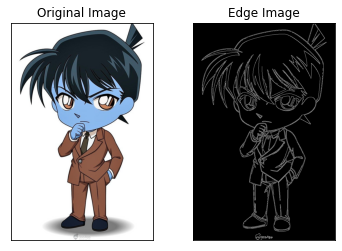

In [22]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://i.pinimg.com/736x/6d/9c/e0/6d9ce08209b81b28c6ea64012e070003.jpg'
img = _download_image(url)

edges = cv2.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Contour

### Xác định các contour

Contour được hiểu đơn giản là một đường cong liên kết với toàn bộ các điểm liên tục (dọc theo đường biên) mà có cùng màu sắc hoặc giá trị cường độ. Contour rất hữu ích trong phân tích hình dạng, phát hiện vật thể và nhận diện vật thể, Một số lưu ý khi sử dụng contour:

- Để độ chính xác cao hơn thì nên sử dụng hình ảnh nhị phân (chỉ gồm 2 màu đen và trắng). Do đó trước khi phát hiện contour thì nên áp dụng threshold hoặc thuật toán `Canny` để chuyển sang ảnh nhị phân.
- Hàm `findContour` và `drawContour` sẽ thay đổi hình ảnh gốc. Do đó nếu bạn muốn hình ảnh gốc sau khi tìm được contour, hãy lưu nó vào 1 biến khác.
- Trong `OpenCV`, tìm các contours như là tìm các vật thể màu trắng từ nền màu đen. Do đó hãy nhớ rằng, object cần tìm nên là màu trắng và background nên là nền màu đen.

In [23]:
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

url = 'https://c4.wallpaperflare.com/wallpaper/279/111/762/close-up-pile-pipes-round-wallpaper-preview.jpg'
img = _download_image(url)

# TODO: Lọc ảnh nhị phân bằng thuật toán Canny
img_canny = cv2.Canny(img, 100, 200)

contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Có 3 tham số trong hàm `cv2.findContours()`, đầu tiên là hình ảnh gốc, thứ 2 là phương pháp trích xuất contours, thứ 3 là phương pháp xấp xỉ contour. Kết quả trả về là hình ảnh và contours. Trong đó contours là một list của toàn bộ các contours xác định trong hình ảnh. Mỗi contour là một `numpy array` của các tọa độ (x, y) của các điểm biên trong object.

Sau khi tích xuất được các contoursthif chúng ta sẽ vẽ các contour thông qua hàm `cv2.drawContours()`. Nó có thể được sử dụng để vẽ bất kì hình dạng nào mà bạn có các tọa độ điểm biên của nó. Các tham số chính của hàm này:

- Tham số đầu tiên: hình ảnh gốc.
- Tham số thứ 2: List các contours cần vẽ. Mỗi phần tử của list là array tọa độ của các điểm biên của một contour.
- Tham số thứ 3: Index của contour. Chẳng hạn chúng ta chỉ muốn lựa chọn ra một contour ở những index nhất định thuộc list contours thì khai báo index tại đây. Muốn vẽ toàn bộ các contour thì thiết lập giá trị cho tham số này bằng -1.
- Thành phần còn lại sẽ là tham số về màu sắc, độ dày của contours.

(([], []), ([], []))

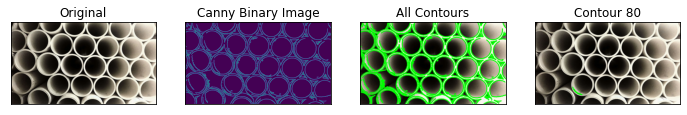

In [29]:
img_origin = img.copy()
img1 = img.copy()
img2 = img.copy()

# TODO: Vẽ toàn bộ contours trên hình ảnh gốc
cv2.drawContours(img1, contours, -1, (0, 255, 0), 3)

# TODO: Chỉ vẽ contour thứ 80 trên hình ảnh gốc
cv2.drawContours(img2, contours, 80, (0, 255, 0), 3)


plt.figure(figsize = (12, 3))

plt.subplot(141),plt.imshow(img_origin),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(142),plt.imshow(img_canny),plt.title('Canny Binary Image')
plt.xticks([]), plt.yticks([])

plt.subplot(143),plt.imshow(img1),plt.title('All Contours')
plt.xticks([]), plt.yticks([])

plt.subplot(144),plt.imshow(img2),plt.title('Contour 80')
plt.xticks([]), plt.yticks([])

### Các đặc trưng của Contour

Tiếp theo chúng ta tìm hiểu xem các đặc trưng như kích thước dài, rộng, diện tích, tâm,... của một contour là gì? và có thể tính toán chúng trên `OpenCV` như thế nào?

**Moment**

Các moments của hình ảnh sẽ giúp chúng ta tính toán tâm của vật thể và diện tích của vật thể. Hàm `cv2.moments()` sẽ hỗ trợ thực hiện tính toán các moments. Kết quả trả về là một dictionary.

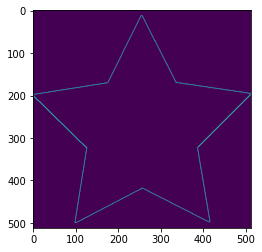

In [32]:
import cv2
import numpy as np

url = 'https://image.flaticon.com/icons/png/512/130/130188.png'
img = _download_image(url)

# TODO: Khởi tạo nhị phân canny
img_canny = cv2.Canny(img, 100, 255)

plt.imshow(img_canny)

# TODO: Tìm kiếm contours trên ảnh nhị phân từ bộ lọc canny
contours, hierarchy = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Moment values of count 0: {'m00': 129.5, 'm10': 9821.833333333332, 'm01': 35877.166666666664, 'm20': 1204998.5833333333, 'm11': 3155542.208333333, 'm02': 10432159.25, 'm30': 218048987.95000002, 'm21': 443324957.01666665, 'm12': 1071073460.4833333, 'm03': 3214254682.55, 'mu20': 460068.77616902627, 'mu11': 434464.5907872161, 'mu02': 492614.1687044203, 'mu30': 56869583.044915825, 'mu21': 43584319.12291357, 'mu12': 39122522.03416099, 'mu03': 51138718.292099, 'nu20': 27.43362658094103, 'nu11': 25.90686428569736, 'nu02': 29.374288916648254, 'nu30': 297.99269854672315, 'nu21': 228.3788305516631, 'nu12': 204.9993210906005, 'nu03': 267.963361926664}


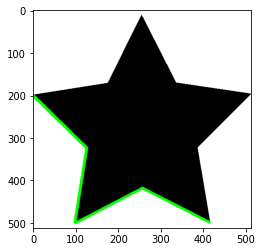

In [39]:
# TODO: Vẽ contour 0 trên hình ảnh gốc
img1 = img.copy()
cv2.drawContours(img1, contours, 0, (0, 255, 0), 5)
plt.imshow(img1)

# TODO: Lấy ra contour 0
cnt = contours[0]
M = cv2.moments(cnt)
print(f"Moment values of count 0: {M}")

Chúng ta có thể tính ra được tâm của contour 0 theo công thức:

$c_x = \frac{M_{10}}{M_{00}}, c_y = \frac{M_{01}}{M_{00}}$

Để tính diện tích của contour chúng ta dùng hàm `cv2.contourArea()` hoặc phần từ `M['m00']`.

Centroid position (75, 277)
Area of contour 0: 129.5


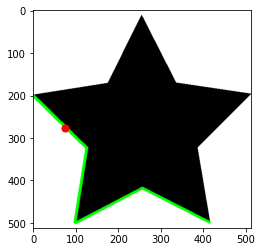

In [48]:
# TODO: Tính toán tâm của contour 0

cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

print(f"Centroid position ({cx}, {cy})")

# TODO: TÍnh diện tích contour 0
area = cv2.contourArea(cnt)

print(f"Area of contour 0: {area}")

# TODO: Vẽ biểu đồ tâm contour 0 và contour 0
plt.imshow(img1)
plt.scatter(cx, cy, s=50, c='red', marker='o')

In [ ]:
## 